<a href="https://colab.research.google.com/github/vasantha32/Python/blob/main/Ibmsmartinternzzzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Score:  0.9264485785953177
Accuracy: 0.8153846153846154
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.52      0.65        21
         1.0       0.81      0.95      0.88        44

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.76        65
weighted avg       0.82      0.82      0.80        65



Text(113.9222222222222, 0.5, 'true value')

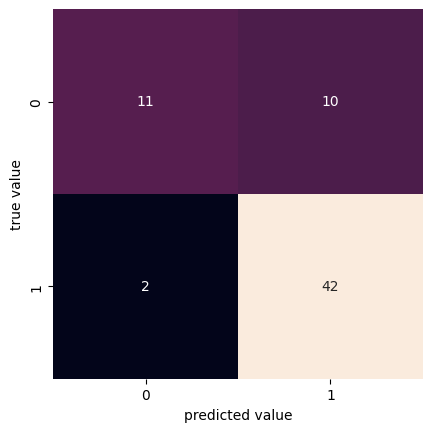

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


recruit = pd.read_csv('/content/drive/MyDrive/Placement _data')

recruit.loc[recruit['gender'] == 'M', 'gender'] = 1.0
recruit.loc[recruit['gender'] == 'F', 'gender'] = 0.0

recruit.loc[recruit['status'] == 'Placed', 'status'] = 1
recruit.loc[recruit['status'] == 'Not Placed', 'status'] = 0

recruit.loc[recruit['workex'] == 'Yes', 'workex'] = 1.0
recruit.loc[recruit['workex'] == 'No', 'workex'] = 0.0


categorical_var = ['ssc_b','hsc_b','hsc_s','degree_t','specialisation']


# create dummy variables for all the other categorical variables

for variable in categorical_var:
# #     fill missing data
#     recruit[variable].fillna('Missing',inplace=True)
#     create dummy variables for given columns
    dummies = pd.get_dummies(recruit[variable],prefix=variable)
#     update data and drop original columns
    recruit = pd.concat([recruit,dummies],axis=1)
    recruit.drop([variable],axis=1,inplace=True)

recruit_placed = recruit[recruit['status'] == 1].drop('status',axis = 1)
x = recruit.drop(['status','salary'], axis=1)
y = recruit['status'].astype(float)

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)
rf_regressor = RandomForestRegressor(100, oob_score=True,
                                     n_jobs=-1, random_state=42)
rf_regressor.fit(train_x,train_y)
print('Score: ', rf_regressor.score(train_x,train_y))
rf_classifier = RandomForestClassifier(200, oob_score=True,
                                     n_jobs=-1, random_state=42)
rf_classifier.fit(train_x, train_y)
pred_y = rf_classifier.predict(test_x)
rf_classifier.score(test_x, test_y)

accuracy = accuracy_score(test_y, pred_y)
classification_rep = classification_report(test_y, pred_y)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
#heat map
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

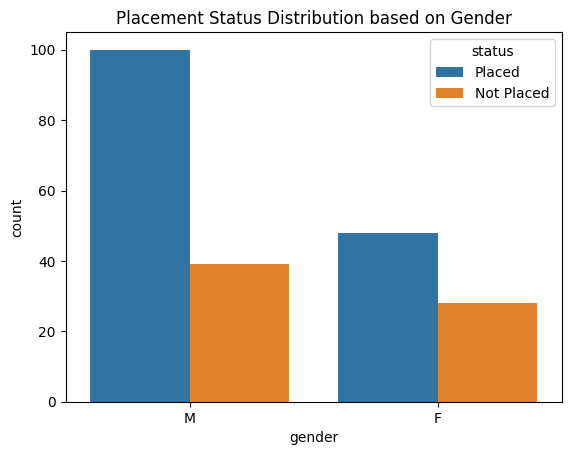

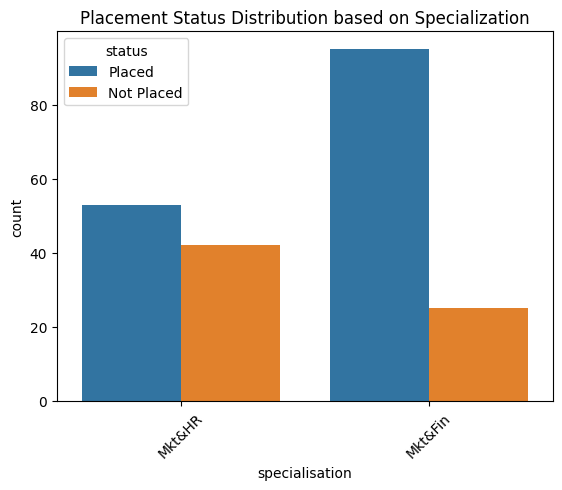

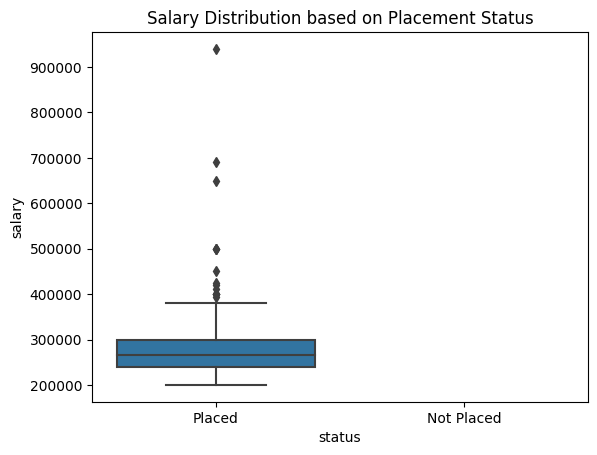

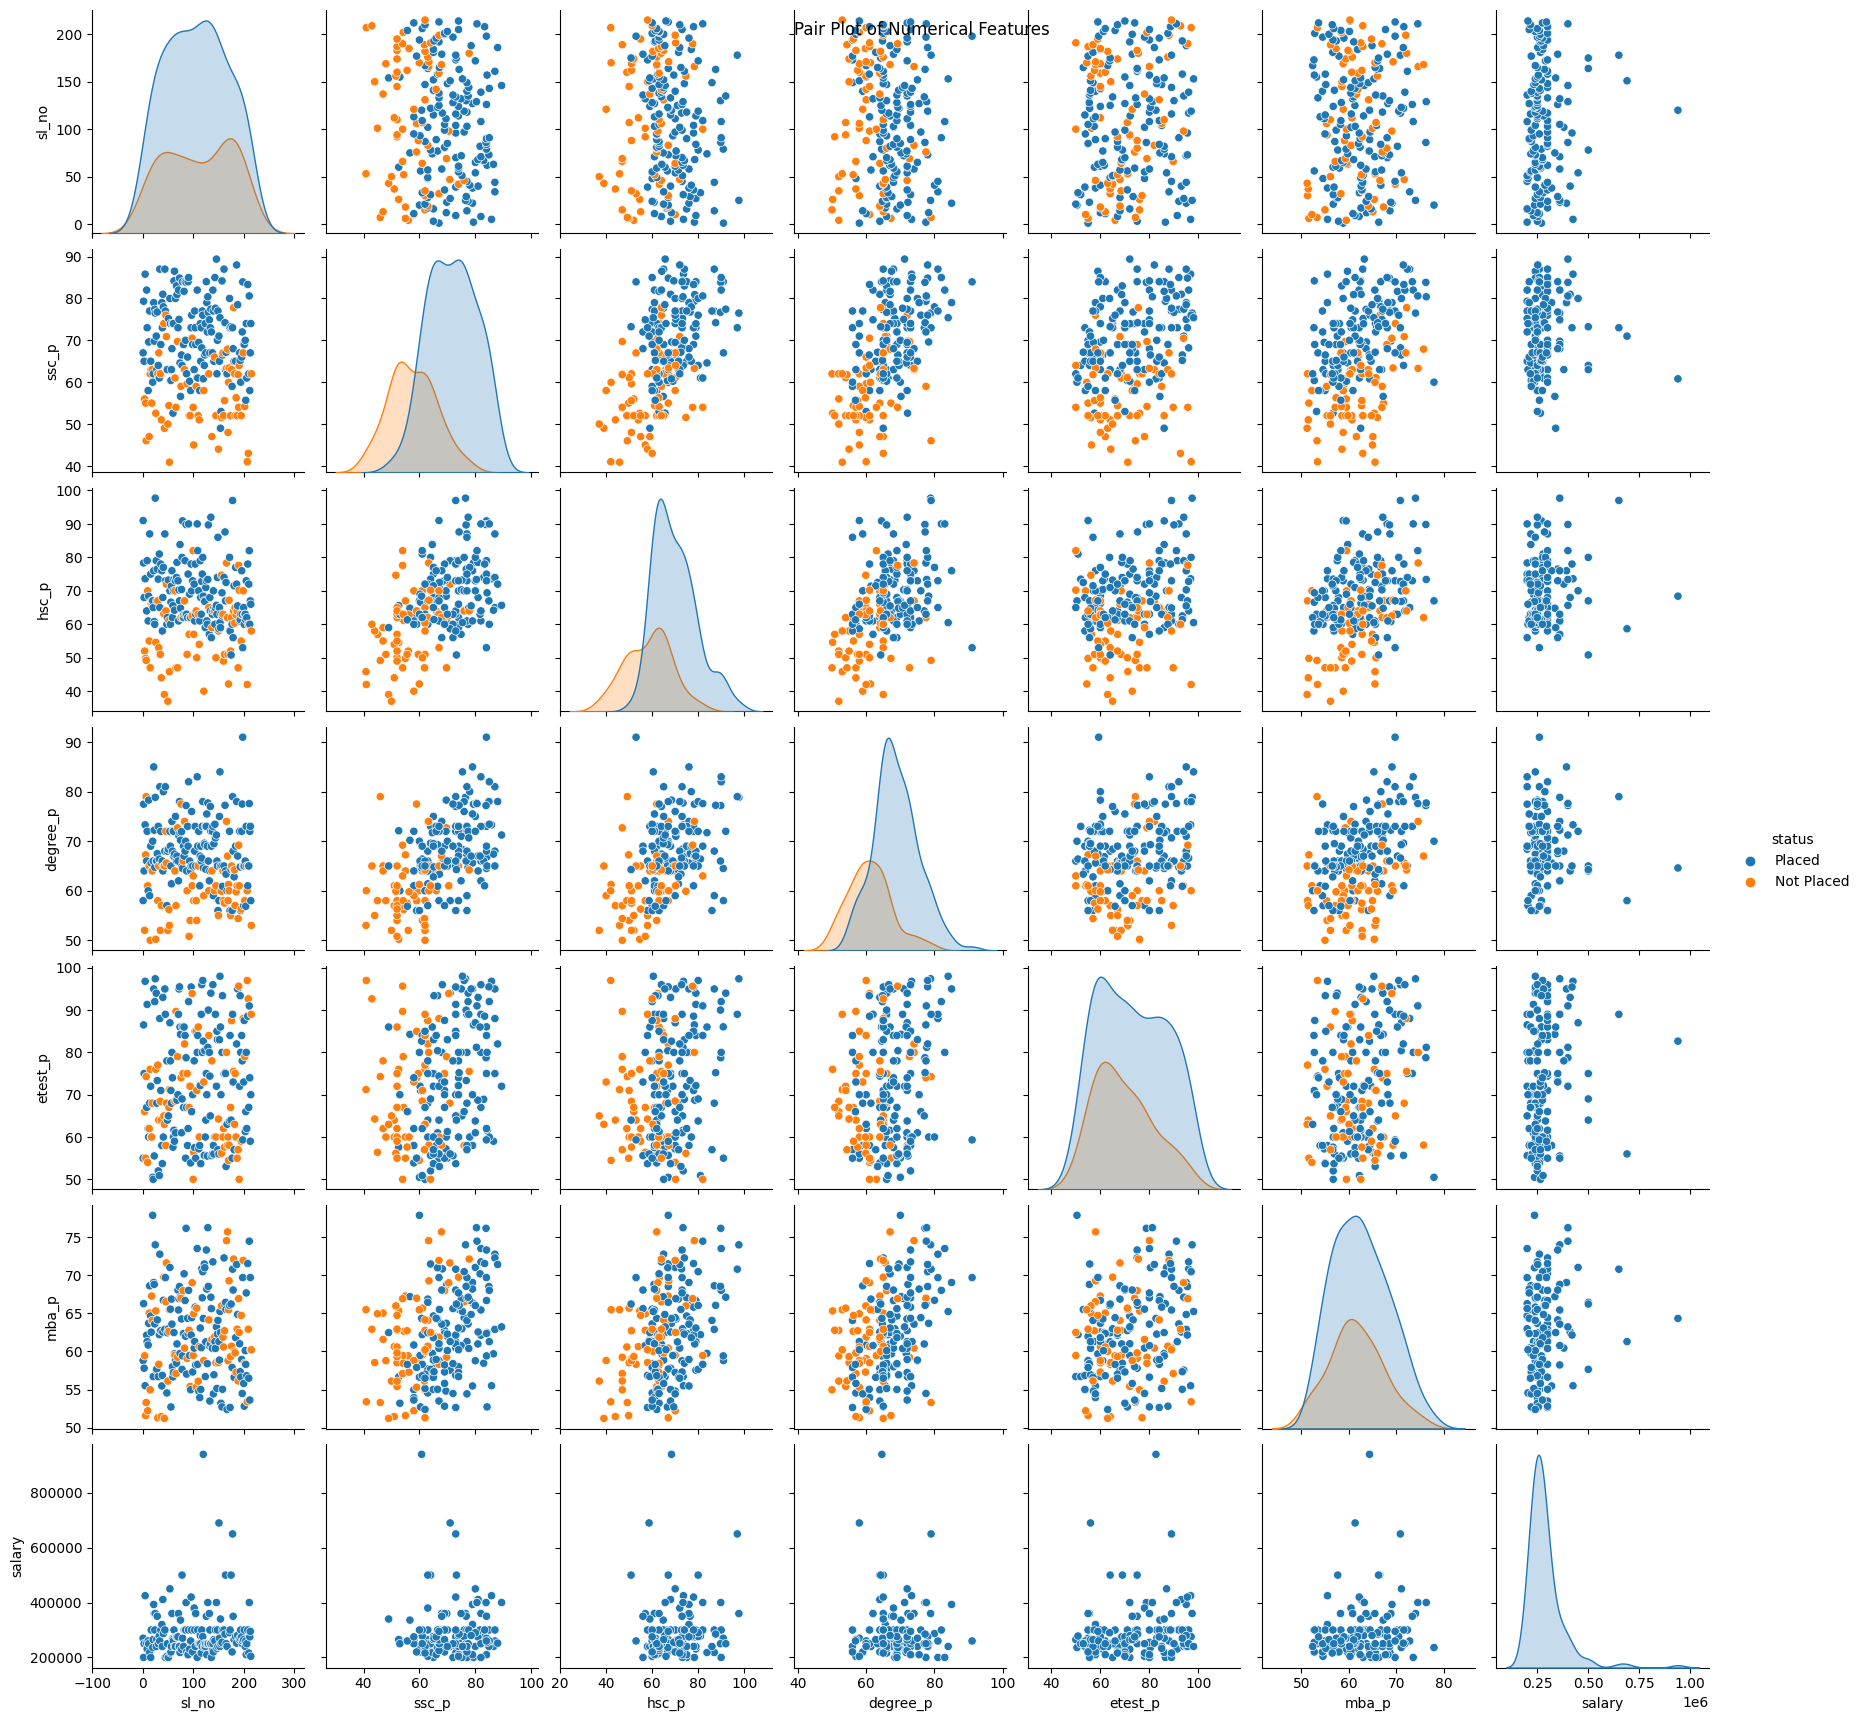

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/drive/MyDrive/Placement _data')

sns.countplot(x='gender', hue='status', data=data)
plt.title("Placement Status Distribution based on Gender")
plt.show()

sns.countplot(x='specialisation', hue='status', data=data)
plt.title("Placement Status Distribution based on Specialisation")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='status', y='salary', data=data)
plt.title("Salary Distribution based on Placement Status")
plt.show()


sns.pairplot(data, hue='status', diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features")
plt.show()

# New section